In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Maze():
    def __init__(self,maze,start,end):
        self.maze = maze
        self.maze_height = maze.shape[0] # Get the height of the maze (number of rows)
        self.maze_width = maze.shape[1]  # Get the width of the maze (number of columns)
        self.start_position = start   # Set the start position in the maze as a tuple (x, y)
        self.goal_position = end

    def show(self):
        plt.figure(figsize=(10,10))

        plt.imshow(self.maze,cmap="gray")
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)
        
        plt.xticks([]), plt.yticks([])

        plt.show()

        

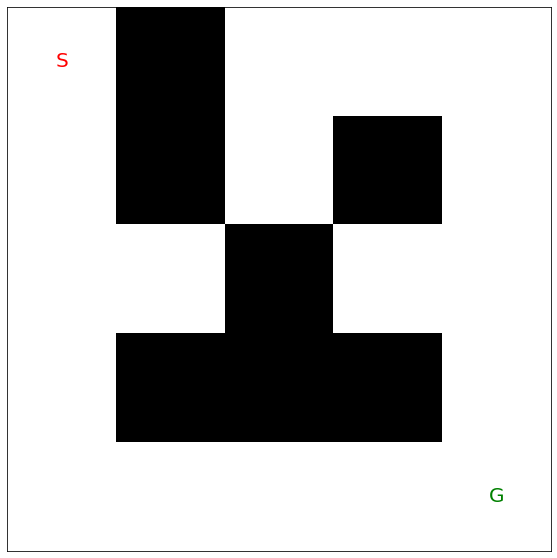

(5, 5)


In [6]:
maze_draw = np.array([
    [1, 0, 1, 1, 1],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 1],
])

maze = Maze(maze_draw,(0,0),(maze_draw.shape[1]-1,maze_draw.shape[0]-1))
maze.show()
print(maze_draw.shape)

In [7]:
actions = [(-1, 0), 
          (1, 0),   
          (0, -1), 
          (0, 1)]
class QAgent():
    def __init__(self,maze,lr =0.1,gamma = 0.9,exp_s = 1,exp_e = 0.01,num = 100):
        self.q_table = np.zeros((maze.maze_height,maze.maze_width,4))
        self.gamma = gamma
        self.lr = lr
        self.exp_s = exp_s
        self.exp_e = exp_e
        self.num = num

    def get_exploration_rate(self,current_episode):
        exp_rate = self.exp_s*(self.exp_e/self.exp_s) **(current_episode/self.num)
        return exp_rate
    def get_action(self,state,current_episode):
        exp_rate = self.get_exploration_rate(current_episode)
        if np.random.rand() < exp_rate:
            return np.random.randint(4) 
        else:
            return np.argmax(self.q_table[state])
        
    def update_q_table(self, state, action, next_state, reward):

        best_next_action = np.argmax(self.q_table[next_state])


        current_q_value = self.q_table[state][action]


        new_q_value = current_q_value + self.lr * (reward + self.gamma * self.q_table[next_state][best_next_action] - current_q_value)


        self.q_table[state][action] = new_q_value  
        

In [8]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

In [32]:
def begin(agent,maze,current_episode,train = True):
    current_state = maze.start_position
    is_done = False
    ep_reward = 0
    step = 0
    path = [current_state]

    while not is_done:
        action = agent.get_action(current_state,current_episode)

        next_state = (current_state[0] + actions[action][0],current_state[1]+actions[action][1])


        if next_state[0] <0 or next_state[0] >= 4 or next_state[1] <0 or next_state[1] >= 4 or maze.maze[next_state[1]][next_state[0]] == 0:
            reward = wall_penalty
            next_state = current_state
         
            
        elif next_state == maze.goal_position:
            path.append(current_state)
            reward = goal_reward
            is_done = True
        else:
            path.append(current_state)
            reward = step_penalty

        ep_reward = reward + ep_reward
        step = step +1


        if train == True:
            agent.update_q_table(current_state, action, next_state, reward)

            current_state = next_state
    return ep_reward, step, path
    



In [33]:
agent = QAgent(maze)


In [34]:
def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []

    # Loop over the specified number of episodes
    for episode in range(num_episodes):
        episode_reward, episode_step, path = begin(agent, maze, episode, train=True)

        # Store the episode's cumulative reward and the number of steps taken in their respective lists
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)
        print(f"cuurent episode --- {episode}")
        print(f"current reward {episode_reward}")

    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    plt.ylim(0, 100)
    plt.title('Steps per Episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps}")

    plt.tight_layout()
    plt.show()

In [35]:
train_agent(agent, maze, num_episodes=100)

KeyboardInterrupt: 

In [27]:
def test_agent(agent, maze, num_episodes=1):
    # Simulate the agent's behavior in the maze for the specified number of episodes
    episode_reward, episode_step, path = begin(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    # Clear the existing plot if any
    if plt.gcf().get_axes():
        plt.cla()

    # Visualize the maze using matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal position (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    # Mark the agent's path with blue '#' symbols
    for position in path:
        plt.text(position[0], position[1], "#", va='center', color='blue', fontsize=20)

    # Remove axis ticks and grid lines for a cleaner visualization
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()

    return episode_step, episode_reward

Learned Path:
(0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0)-> (0, 0

<Figure size 432x288 with 0 Axes>

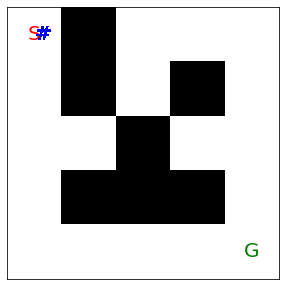

(332, -341)

In [28]:
test_agent(agent, maze, num_episodes=100)